# Import all necessary 

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import savefig

warnings.filterwarnings('ignore')

## Read Data

In [2]:
df = pd.read_excel('./data/literature.xlsx',
                  sheet_name = 'Main', header=[1,2])

In [3]:
df.rename(columns={'Unnamed: 0_level_1':'',
                   'Unnamed: 1_level_1':'',
                   'Unnamed: 2_level_1':'',
                   'Unnamed: 3_level_1':'',
                   'Unnamed: 50_level_1':'',
                   'Unnamed: 52_level_1':'',
                   'Unnamed: 53_level_1':''
                  }, inplace=True)

## Specify overall categories

In [4]:
artefacts = ['Konstrukt', 'Methode', 'Model', 'Instanz']
evaluation = ['Beobachtung', 'Analytisch', 'Experiementel', 'Testing', 'Beschreibende']

artefacts_lv1 = df[artefacts].columns.get_level_values(1)
evaluation_lv1 = df[evaluation].columns.get_level_values(1)

all_categories = artefacts+evaluation

## Transform Data to singlelevel

In [5]:
dfnl = df.droplevel(0, axis=1)

In [6]:
dfnl.columns = ['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper']+dfnl.columns[4:].tolist()

# Results

**Wie viele Paper (in %) validieren ihre Artefakte trotz DSR nicht?**

In [7]:
df_eva = df[['Konferenz', 'Paper', 'DSR nicht verwendet']]

In [8]:
df_eva = df_eva[df_eva['DSR nicht verwendet'] == 0].drop('DSR nicht verwendet', axis=1)

In [9]:
for i in evaluation:
    df_eva[str(i)] = df[str(i)].sum(axis=1)
    
    
df_eva['Evaluiert'] = df_eva.apply(lambda x: 1 if x[['Beobachtung', 'Analytisch', 'Experiementel', 'Testing', 'Beschreibende']].sum() > 0 else 0, axis = 1)

In [10]:
df_eva.head()

,Konferenz,Paper,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende,Evaluiert
,,,,,,,,
0,WI,(Espig et al 2019),0,0,1,1,0,1
2,WI,(Herrenkind et al 2019),1,0,0,1,0,1
4,WI,(Poeppelbuss and Lubarski 2019),0,0,0,0,0,0
9,WI,(Lübbecke et al 2019),1,0,0,1,0,1
12,WI,(Vogel and Thomas 2019),0,0,0,0,0,0


In [11]:
df_eva_grouped = df_eva.groupby('Konferenz').count()[['Paper']].join(df_eva.groupby('Konferenz').sum())

In [12]:
df_eva_grouped['Evaluiert in %'] = df_eva_grouped.apply(lambda x: round((x['Evaluiert']/x['Paper'])*100,2),axis=1)
df_eva_grouped['Nicht Evaluiert in %'] = 100-df_eva_grouped['Evaluiert in %']

In [13]:
df_eva_grouped.head()

,Paper,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende,Evaluiert,Evaluiert in %,Nicht Evaluiert in %
,,,,,,,,,
Konferenz,,,,,,,,,
DESRIST,90,76,10,18,17,11,76,84.44,15.56
MKWI,58,42,3,13,4,8,45,77.59,22.41
WI,52,49,3,15,6,3,38,73.08,26.92


In [39]:
blub = df_eva[df_eva["Konferenz"] == "DESRIST"]
blub[blub["Analytisch"] == 1]

,Konferenz,Paper,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende,Evaluiert
,,,,,,,,
128,DESRIST,(Wörner 2016),0,1,0,0,0,1
131,DESRIST,(Fischer et al 2017),1,1,0,0,0,1
132,DESRIST,(Hake et al 2017),0,1,1,1,0,1
148,DESRIST,Lück and Leyh 2017),1,1,0,0,0,1
151,DESRIST,(Alharbi and Chatterjee 2017),1,1,1,0,0,1
182,DESRIST,(Jones and Mansingh 2018),0,1,0,0,0,1
184,DESRIST,(Ginige et al 2018),1,1,0,0,0,1
227,DESRIST,"(Brahma et al, 2019)",0,1,0,2,0,1
228,DESRIST,"(Chaudhry et al, 2019)",1,1,0,0,0,1


**In welchen Kombinationen werden die Artefakte und Evaluierungsmethoden eingesetzt?**

**Gesamt**

In [23]:
df.head()

Konferenz-ID Konferenz  Jahr                            Paper Konstrukt  \
                                                                Vokabular   
0      WI 2019        WI  2019               (Espig et al 2019)         0   
1      WI 2019        WI  2019              (Dremel et al 2019)         0   
2      WI 2019        WI  2019          (Herrenkind et al 2019)         0   
3      WI 2019        WI  2019        (Sauer und Schubert 2019)         0   
4      WI 2019        WI  2019  (Poeppelbuss and Lubarski 2019)         0   

                                                                    Methode  \
  Sprachen Semantic data Model Meta-Model Modellierungssprache Modellierung   
0        0                   0          0                    0            0   
1        0                   0          0                    0            0   
2        0                   0          0                    0            0   
3        0                   0          0                    0            0   
4        0                   0          0                    0            0   

   ... Experiementel                                      Testing  \
   ...    Simulation Softwareprototyp Funktionale Test (Blackbox)   
0  ...             0                0                           0   
1  ...             0                0                           0   
2  ...             0                0                           1   
3  ...             0                0                           0   
4  ...             0                0                           0   

                                                              Beschreibende  \
  Strukturelle Tests (Whitebox) Kriterienbasierte Evaluierung Argumentation   
0                             0                             1             0   
1                             0                             0             0   
2                             0                             0             0   
3                             0                             0             0   
4                             0                             0             0   

                                 Keine Evaluierung DSR nicht verwendet  
  Szenarien Koknitive Evaluation                                        
0         0                    0                 0                   0  
1         0                    0                 0                   1  
2         0                    0                 0                   0  
3         0                    0                 0                   1  
4         0                    0                 1                   0  

[5 rows x 54 columns]

In [24]:
df_cat = df.drop(columns=['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper'])

In [25]:
df_cat

Konstrukt                                                               \
    Vokabular Sprachen Semantic data Model Meta-Model Modellierungssprache   
0           0        0                   0          0                    0   
1           0        0                   0          0                    0   
2           0        0                   0          0                    0   
3           0        0                   0          0                    0   
4           0        0                   0          0                    0   
..        ...      ...                 ...        ...                  ...   
234         0        0                   0          0                    0   
235         0        0                   0          0                    0   
236         0        0                   0          0                    0   
237         0        0                   0          0                    0   
238         0        0                   0          0                    0   

         Methode                                                           \
    Modellierung Konstruktionsmethoden Guideline / Richtlinien / Letfaden   
0              0                     0                                  0   
1              0                     0                                  0   
2              0                     0                                  0   
3              0                     0                                  0   
4              0                     0                                  0   
..           ...                   ...                                ...   
234            0                     0                                  1   
235            0                     0                                  0   
236            0                     0                                  0   
237            0                     0                                  0   
238            0                     0                                  0   

                                                      ... Experiementel  \
    Projekt(management)methoden Evaluierungsmethoden  ...    Simulation   
0                             0                    1  ...             0   
1                             0                    0  ...             0   
2                             0                    0  ...             0   
3                             0                    0  ...             0   
4                             0                    0  ...             0   
..                          ...                  ...  ...           ...   
234                           0                    0  ...             0   
235                           0                    1  ...             0   
236                           0                    0  ...             0   
237                           0                    0  ...             1   
238                           0                    0  ...             0   

                                         Testing  \
    Softwareprototyp Funktionale Test (Blackbox)   
0                  0                           0   
1                  0                           0   
2                  0                           1   
3                  0                           0   
4                  0                           0   
..               ...                         ...   
234                0                           0   
235                0                           0   
236                0                           0   
237                0                           0   
238                1                           0   

                                                                Beschreibende  \
    Strukturelle Tests (Whitebox) Kriterienbasierte Evaluierung Argumentation   
0                               0                             1             0   
1                               0                             0             0   
2         

In [26]:
df_heat = df_cat.T.dot(df_cat)

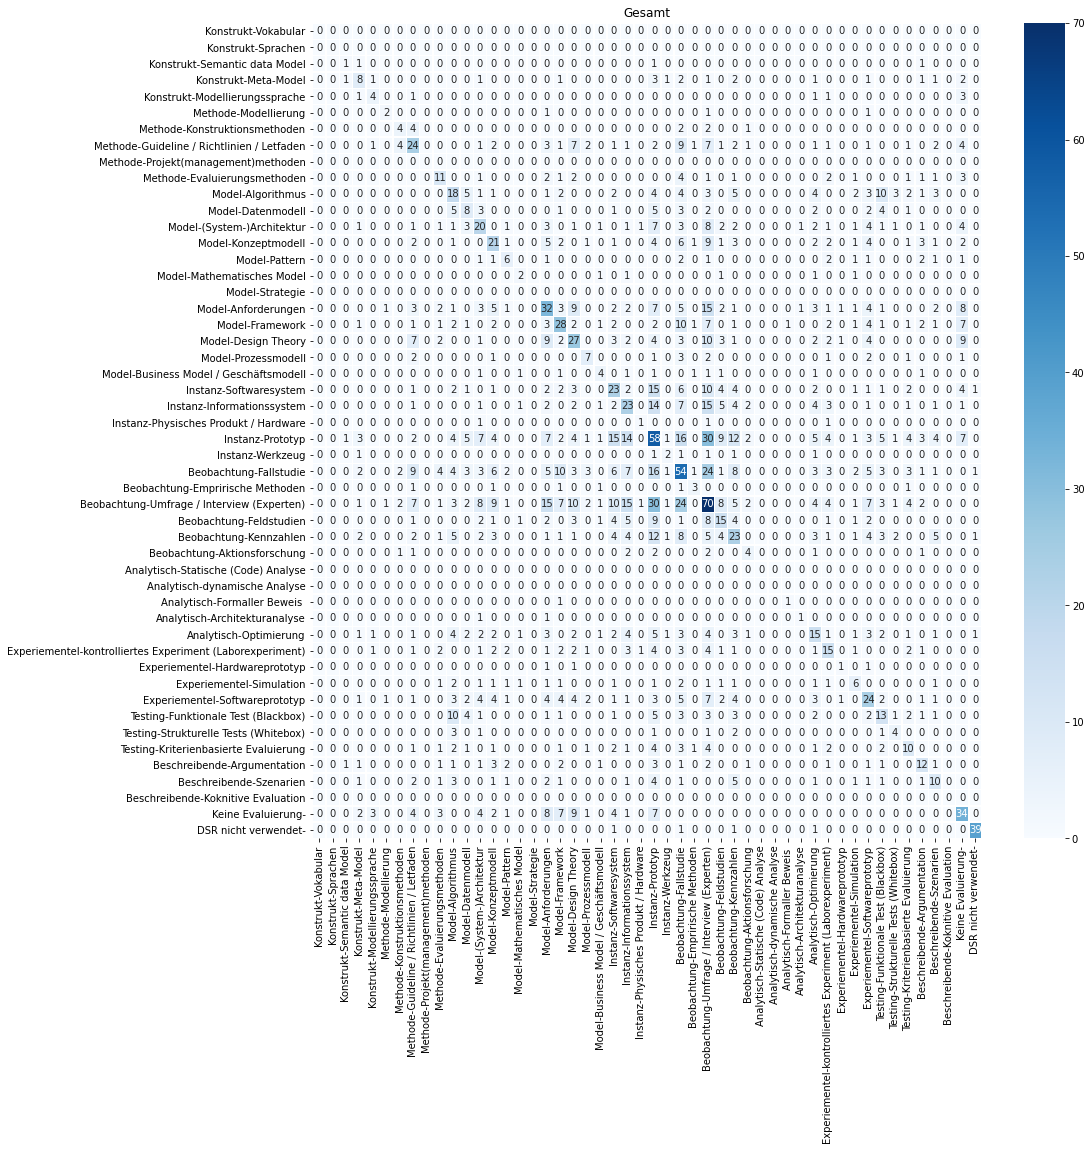

In [27]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='Gesamt', xlabel='', ylabel='');
plt.savefig('./img/Gesamt_Gesamt.png', dpi=400)

In [28]:
df_heat = dfnl[artefacts_lv1].T.dot(dfnl[evaluation_lv1])

In [29]:
df_heat

,Fallstudie,Emprirische Methoden,Umfrage / Interview (Experten),Feldstudien,Kennzahlen,Aktionsforschung,Statische (Code) Analyse,dynamische Analyse,Formaller Beweis,Architekturanalyse,...,kontrolliertes Experiment (Laborexperiment),Hardwareprototyp,Simulation,Softwareprototyp,Funktionale Test (Blackbox),Strukturelle Tests (Whitebox),Kriterienbasierte Evaluierung,Argumentation,Szenarien,Koknitive Evaluation
Vokabular,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sprachen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Semantic data Model,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Meta-Model,2,0,1,0,2,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
Modellierungssprache,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Modellierung,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Konstruktionsmethoden,2,0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guideline / Richtlinien / Letfaden,9,1,7,1,2,1,0,0,0,0,...,1,0,0,1,0,0,1,0,2,0
Projekt(management)methoden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Evaluierungsmethoden,4,0,1,0,1,0,0,0,0,0,...,2,0,1,0,0,0,1,1,1,0


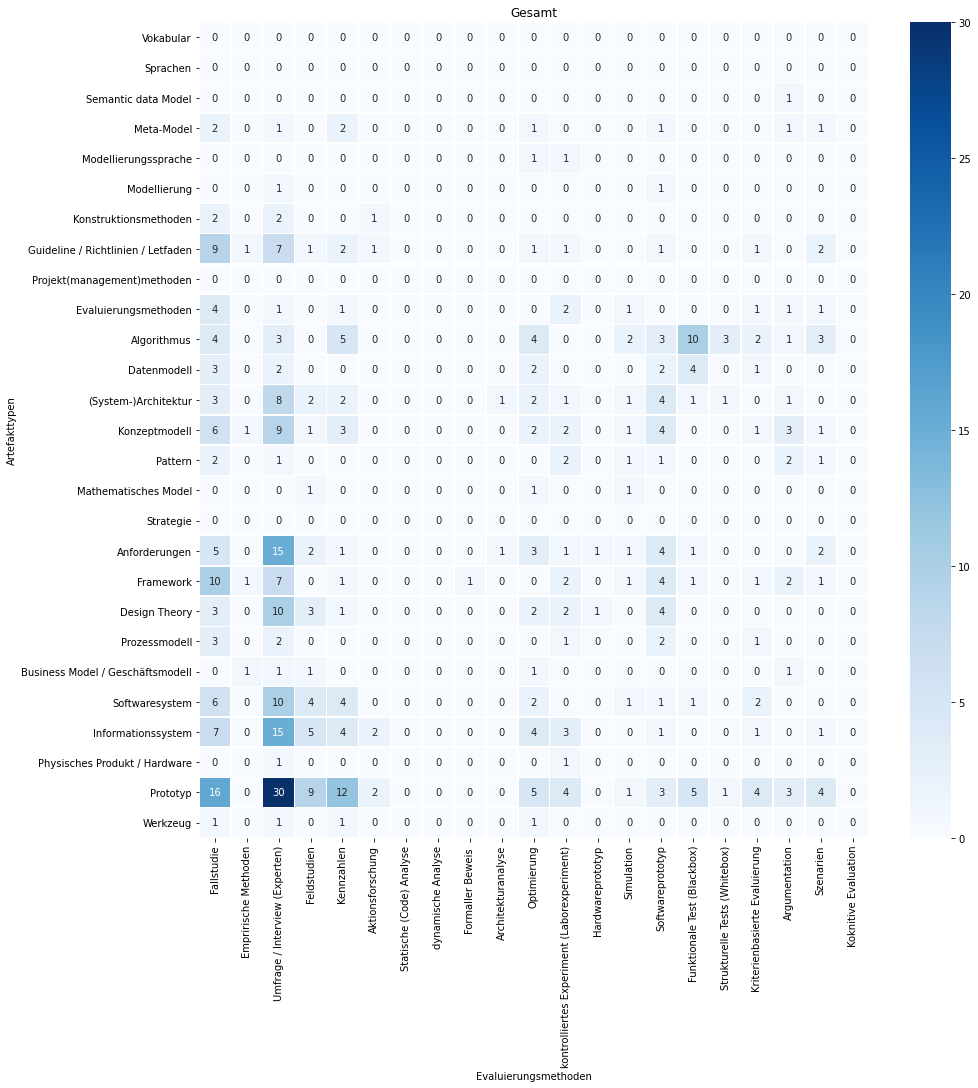

In [30]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='Gesamt', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/ArtVal_Gesamt.png', dpi=400)

In [31]:
df_cat = df[['Konferenz', 'Paper', 'DSR nicht verwendet']]

In [32]:
df_cat.head()

,Konferenz,Paper,DSR nicht verwendet
,,,
0,WI,(Espig et al 2019),0
1,WI,(Dremel et al 2019),1
2,WI,(Herrenkind et al 2019),0
3,WI,(Sauer und Schubert 2019),1
4,WI,(Poeppelbuss and Lubarski 2019),0


In [33]:
for i in all_categories:
    df_cat[str(i)] = df[str(i)].sum(axis=1)

In [34]:
df_cat.head()

,Konferenz,Paper,DSR nicht verwendet,Konstrukt,Methode,Model,Instanz,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,,,,,,,
0,WI,(Espig et al 2019),0,0,1,0,0,0,0,1,1,0
1,WI,(Dremel et al 2019),1,0,0,0,0,0,0,0,0,0
2,WI,(Herrenkind et al 2019),0,0,0,1,0,1,0,0,1,0
3,WI,(Sauer und Schubert 2019),1,0,0,0,0,0,0,0,0,0
4,WI,(Poeppelbuss and Lubarski 2019),0,0,0,1,0,0,0,0,0,0


In [35]:
df_heat = df_cat[artefacts].T.dot(df_cat[evaluation])

In [36]:
df_heat.head()

,,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,
Konstrukt,,5,2,2,0,3
Methode,,33,1,6,2,4
Model,,123,20,49,27,18
Instanz,,130,12,15,14,8


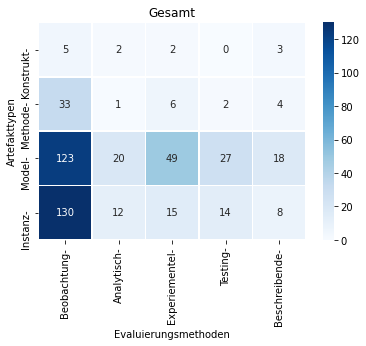

In [28]:
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='Gesamt', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/Kategorien_Gesamt.png', dpi=400)

**DESRIST**

In [37]:
df[df.Konferenz == 'DESRIST'].head()

Konferenz-ID Konferenz  Jahr                             Paper Konstrukt  \
                                                                    Vokabular   
109  DESRIST 2016   DESRIST  2016     (Alharbi und Chatterjee 2016)         0   
110  DESRIST 2016   DESRIST  2016          (Haj-Bolouri et al 2016)         0   
111  DESRIST 2016   DESRIST  2016                (Kurse et al 2016)         0   
112  DESRIST 2016   DESRIST  2016         (Göbel und Cronholm 2016)         0   
113  DESRIST 2016   DESRIST  2016  (Keijzer-Broers und Reuver 2016)         0   

                                                                      Methode  \
    Sprachen Semantic data Model Meta-Model Modellierungssprache Modellierung   
109        0                   0          0                    0            0   
110        0                   0          0                    0            0   
111        0                   0          0                    0            0   
112        0                   0          0                    0            0   
113        0                   0          0                    0            0   

     ... Experiementel                                      Testing  \
     ...    Simulation Softwareprototyp Funktionale Test (Blackbox)   
109  ...             0                0                           0   
110  ...             0                0                           0   
111  ...             0                0                           0   
112  ...             0                0                           0   
113  ...             0                0                           0   

                                                                Beschreibende  \
    Strukturelle Tests (Whitebox) Kriterienbasierte Evaluierung Argumentation   
109                             0                             0             0   
110                             0                             0             0   
111                             0                             0             0   
112                             0                             0             0   
113                             0                             0             0   

                                   Keine Evaluierung DSR nicht verwendet  
    Szenarien Koknitive Evaluation                                        
109         0                    0                 0                   0  
110         0                    0                 0                   1  
111         0                    0                 0                   1  
112         0                    0                 0                   1  
113         0                    0                 0                   1  

[5 rows x 54 columns]

In [38]:
df_temp = df[df['Konferenz'] == 'DESRIST']
df_cat = df_temp[df_temp.Konferenz == 'DESRIST'].drop(columns=['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper'])

In [39]:
df_heat = df_cat.T.dot(df_cat)

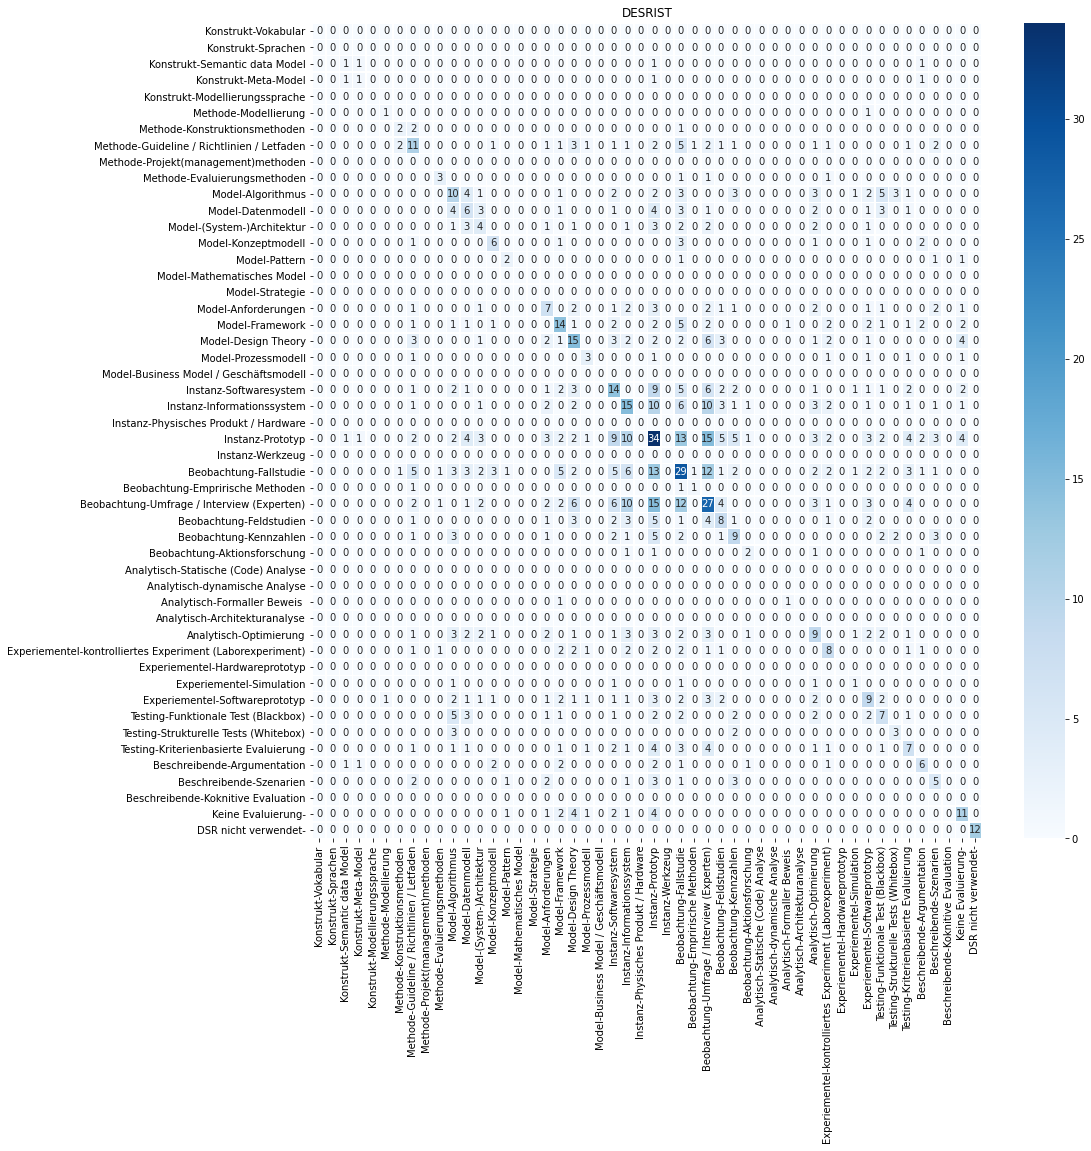

In [40]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='DESRIST', xlabel='', ylabel='');
plt.savefig('./img/Gesamt_DESRIST.png', dpi=400)

In [41]:
dfnl_temp = dfnl[dfnl['Konferenz'] == 'DESRIST']
df_heat = dfnl_temp[artefacts_lv1].T.dot(dfnl_temp[evaluation_lv1])

In [42]:
df_heat

,Fallstudie,Emprirische Methoden,Umfrage / Interview (Experten),Feldstudien,Kennzahlen,Aktionsforschung,Statische (Code) Analyse,dynamische Analyse,Formaller Beweis,Architekturanalyse,...,kontrolliertes Experiment (Laborexperiment),Hardwareprototyp,Simulation,Softwareprototyp,Funktionale Test (Blackbox),Strukturelle Tests (Whitebox),Kriterienbasierte Evaluierung,Argumentation,Szenarien,Koknitive Evaluation
Vokabular,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sprachen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Semantic data Model,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Meta-Model,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Modellierungssprache,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Modellierung,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Konstruktionsmethoden,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guideline / Richtlinien / Letfaden,5,1,2,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,2,0
Projekt(management)methoden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Evaluierungsmethoden,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


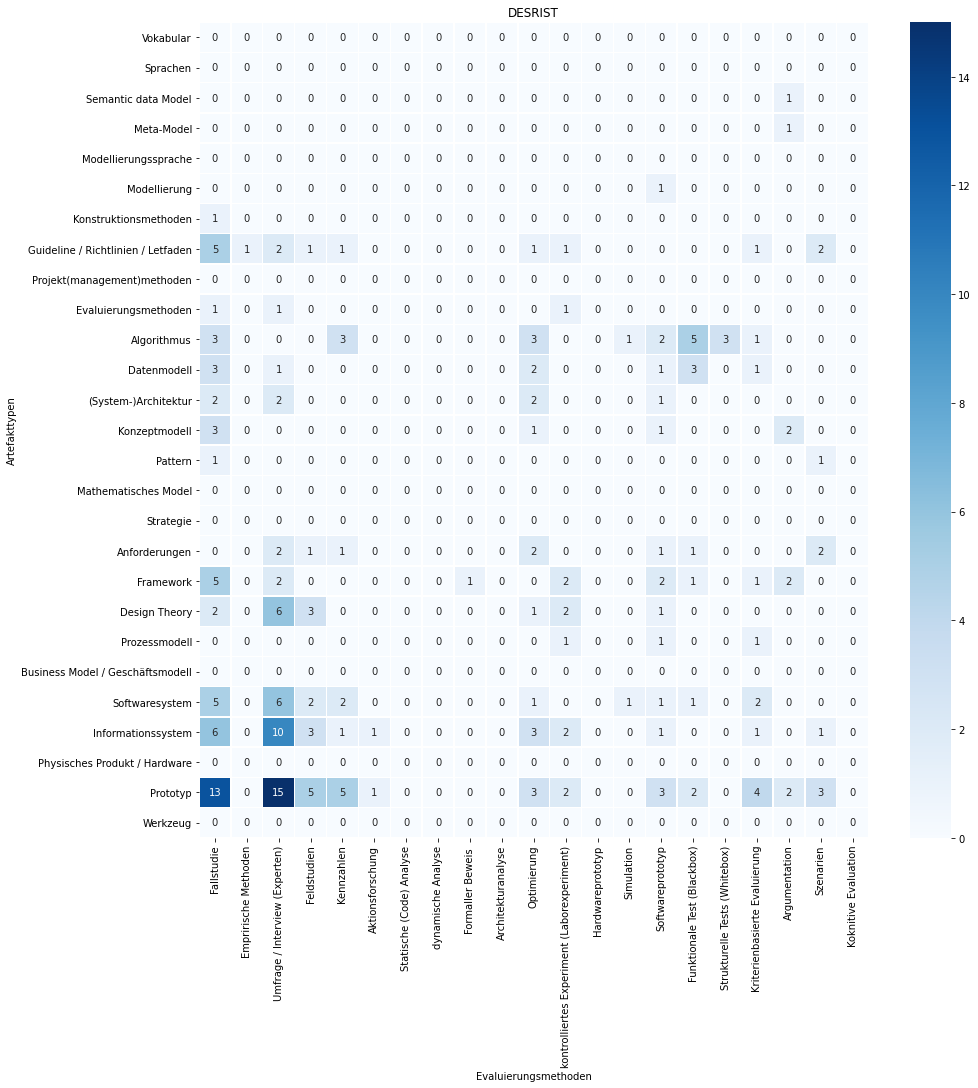

In [43]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='DESRIST', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/ArtVal_DESRIST.png', dpi=400)

In [44]:
df_cat = df[df.Konferenz == 'DESRIST'][['Konferenz', 'Paper', 'DSR nicht verwendet']]

In [45]:
df_cat.head()

,Konferenz,Paper,DSR nicht verwendet
,,,
109,DESRIST,(Alharbi und Chatterjee 2016),0
110,DESRIST,(Haj-Bolouri et al 2016),1
111,DESRIST,(Kurse et al 2016),1
112,DESRIST,(Göbel und Cronholm 2016),1
113,DESRIST,(Keijzer-Broers und Reuver 2016),1


In [46]:
for i in all_categories:
    df_cat[str(i)] = df[df.Konferenz == 'DESRIST'][str(i)].sum(axis=1)

In [47]:
df_cat.head()

,Konferenz,Paper,DSR nicht verwendet,Konstrukt,Methode,Model,Instanz,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,,,,,,,
109,DESRIST,(Alharbi und Chatterjee 2016),0,0,0,0,1,2,0,0,0,0
110,DESRIST,(Haj-Bolouri et al 2016),1,0,0,0,0,0,0,0,0,0
111,DESRIST,(Kurse et al 2016),1,0,0,0,0,0,0,0,0,0
112,DESRIST,(Göbel und Cronholm 2016),1,0,0,0,0,0,0,0,0,0
113,DESRIST,(Keijzer-Broers und Reuver 2016),1,0,0,0,0,0,0,0,0,0


In [48]:
df_heat = df_cat[artefacts].T.dot(df_cat[evaluation])

In [49]:
df_heat.head()

,,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,
Konstrukt,,0,0,0,0,2
Methode,,13,1,3,1,2
Model,,40,12,16,17,7
Instanz,,75,7,10,10,6


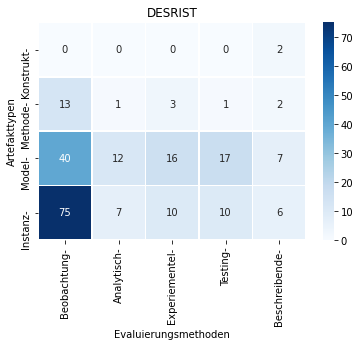

In [50]:
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='DESRIST', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/Kategorien_DESRIST.png', dpi=400)

**MKWI**

In [51]:
df[df.Konferenz == 'MKWI'].head()

Konferenz-ID Konferenz  Jahr                       Paper Konstrukt  \
                                                               Vokabular   
34  MKWI 2018 / B1      MKWI  2018   (Heidekrüger et al, 2018)         0   
35  MKWI 2018 / B1      MKWI  2018  (Oppenlaender et al, 2018)         0   
36  MKWI 2018 / B1      MKWI  2018          (Raso et al, 2018)         0   
37  MKWI 2018 / B1      MKWI  2018   (Spiekermann et al, 2018)         0   
38  MKWI 2018 / B1      MKWI  2018        (Gebski et al, 2018)         0   

                                                                     Methode  \
   Sprachen Semantic data Model Meta-Model Modellierungssprache Modellierung   
34        0                   0          0                    0            0   
35        0                   0          0                    0            0   
36        0                   0          0                    0            0   
37        0                   0          0                    0            0   
38        0                   0          0                    0            0   

    ... Experiementel                                      Testing  \
    ...    Simulation Softwareprototyp Funktionale Test (Blackbox)   
34  ...             0                0                           0   
35  ...             0                0                           0   
36  ...             0                0                           0   
37  ...             0                0                           0   
38  ...             0                0                           0   

                                                               Beschreibende  \
   Strukturelle Tests (Whitebox) Kriterienbasierte Evaluierung Argumentation   
34                             0                             0             0   
35                             0                             0             0   
36                             0                             0             0   
37                             0                             0             0   
38                             0                             0             0   

                                  Keine Evaluierung DSR nicht verwendet  
   Szenarien Koknitive Evaluation                                        
34         0                    0                 1                   0  
35         0                    0                 1                   0  
36         0                    0                 0                   0  
37         0                    0                 0                   1  
38         0                    0                 0                   0  

[5 rows x 54 columns]

In [52]:
df_temp = df[df['Konferenz'] == 'MKWI']
df_cat = df_temp[df_temp.Konferenz == 'MKWI'].drop(columns=['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper'])

In [53]:
df_heat = df_cat.T.dot(df_cat)

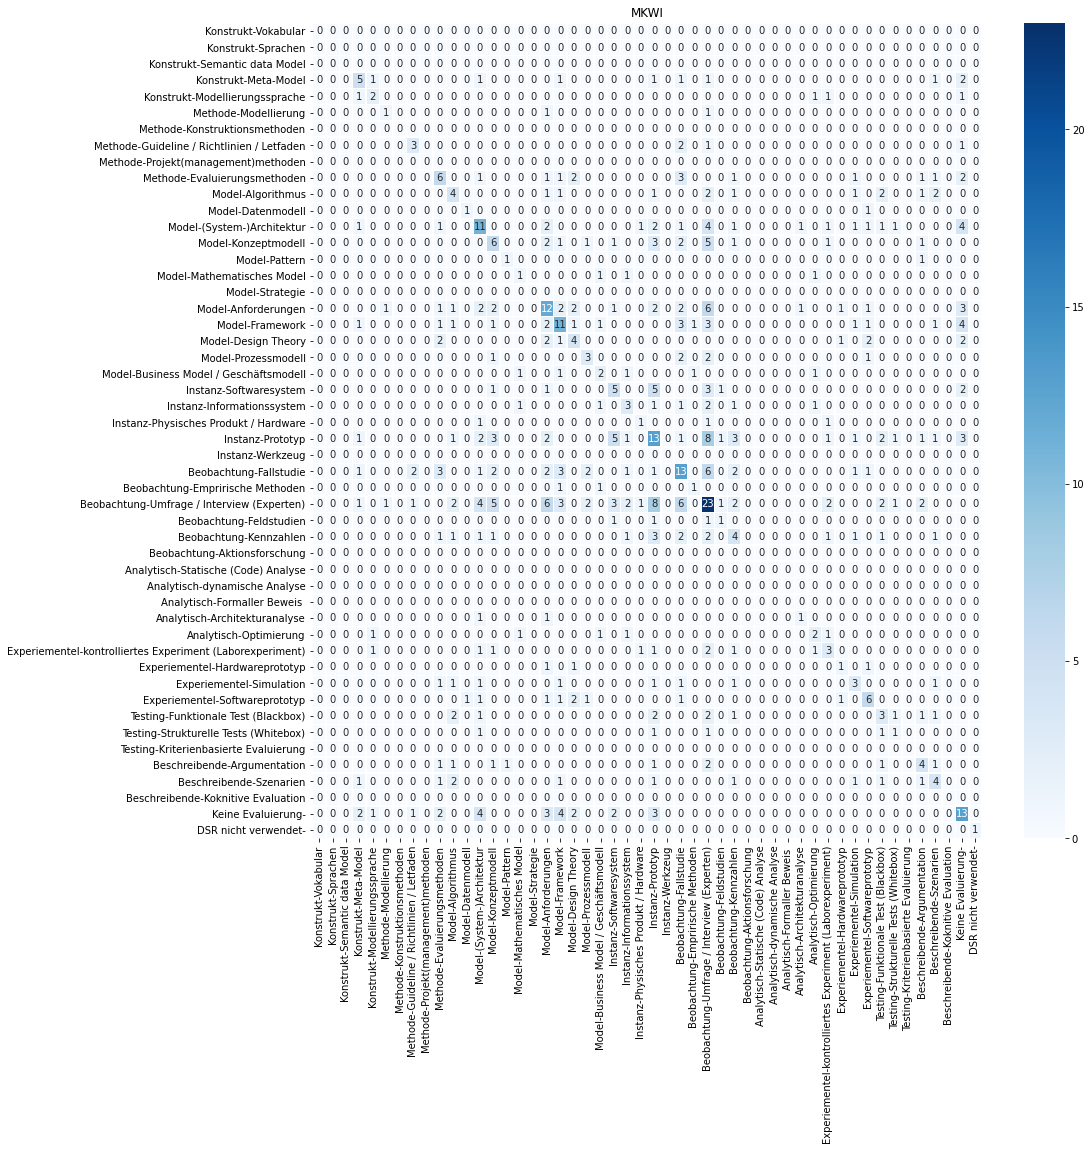

In [54]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='MKWI', xlabel='', ylabel='');
plt.savefig('./img/Gesamt_MKWI.png', dpi=400)

In [55]:
dfnl_temp = dfnl[dfnl['Konferenz'] == 'MKWI']
df_heat = dfnl_temp[artefacts_lv1].T.dot(dfnl_temp[evaluation_lv1])

In [56]:
df_heat

,Fallstudie,Emprirische Methoden,Umfrage / Interview (Experten),Feldstudien,Kennzahlen,Aktionsforschung,Statische (Code) Analyse,dynamische Analyse,Formaller Beweis,Architekturanalyse,...,kontrolliertes Experiment (Laborexperiment),Hardwareprototyp,Simulation,Softwareprototyp,Funktionale Test (Blackbox),Strukturelle Tests (Whitebox),Kriterienbasierte Evaluierung,Argumentation,Szenarien,Koknitive Evaluation
Vokabular,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sprachen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Semantic data Model,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Meta-Model,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Modellierungssprache,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Modellierung,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Konstruktionsmethoden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guideline / Richtlinien / Letfaden,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Projekt(management)methoden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Evaluierungsmethoden,3,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


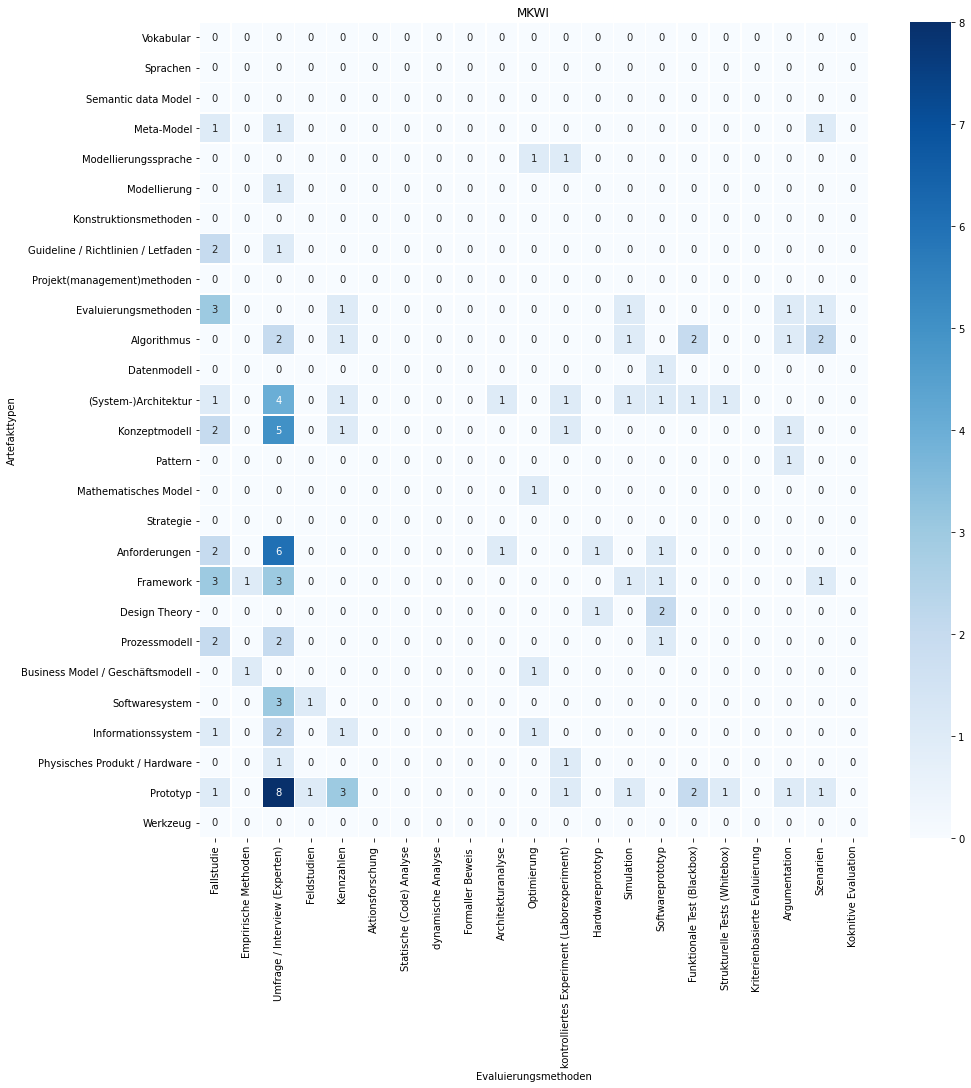

In [57]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='MKWI', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/ArtVal_MKWI.png', dpi=400)

In [58]:
df_cat = df[df.Konferenz == 'MKWI'][['Konferenz', 'Paper', 'DSR nicht verwendet']]

In [59]:
df_cat.head()

,Konferenz,Paper,DSR nicht verwendet
,,,
34,MKWI,"(Heidekrüger et al, 2018)",0
35,MKWI,"(Oppenlaender et al, 2018)",0
36,MKWI,"(Raso et al, 2018)",0
37,MKWI,"(Spiekermann et al, 2018)",1
38,MKWI,"(Gebski et al, 2018)",0


In [60]:
for i in all_categories:
    df_cat[str(i)] = df[df.Konferenz == 'MKWI'][str(i)].sum(axis=1)

In [61]:
df_cat.head()

,Konferenz,Paper,DSR nicht verwendet,Konstrukt,Methode,Model,Instanz,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,,,,,,,
34,MKWI,"(Heidekrüger et al, 2018)",0,0,0,1,0,0,0,0,0,0
35,MKWI,"(Oppenlaender et al, 2018)",0,0,0,1,0,0,0,0,0,0
36,MKWI,"(Raso et al, 2018)",0,0,0,1,1,1,0,1,0,0
37,MKWI,"(Spiekermann et al, 2018)",1,0,0,0,0,0,0,0,0,0
38,MKWI,"(Gebski et al, 2018)",0,0,0,2,1,0,1,0,0,0


In [62]:
df_heat = df_cat[artefacts].T.dot(df_cat[evaluation])

In [63]:
df_heat.head()

,,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,
Konstrukt,,2,1,1,0,1
Methode,,8,0,1,0,2
Model,,37,4,14,4,6
Instanz,,22,1,3,3,2


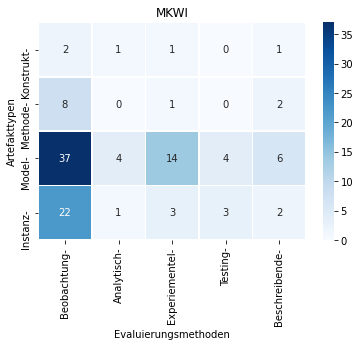

In [64]:
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='MKWI', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/Kategorien_MKWI.png', dpi=400)

**WI**

In [65]:
df[df.Konferenz == 'WI'].head()

Konferenz-ID Konferenz  Jahr                            Paper Konstrukt  \
                                                                Vokabular   
0      WI 2019        WI  2019               (Espig et al 2019)         0   
1      WI 2019        WI  2019              (Dremel et al 2019)         0   
2      WI 2019        WI  2019          (Herrenkind et al 2019)         0   
3      WI 2019        WI  2019        (Sauer und Schubert 2019)         0   
4      WI 2019        WI  2019  (Poeppelbuss and Lubarski 2019)         0   

                                                                    Methode  \
  Sprachen Semantic data Model Meta-Model Modellierungssprache Modellierung   
0        0                   0          0                    0            0   
1        0                   0          0                    0            0   
2        0                   0          0                    0            0   
3        0                   0          0                    0            0   
4        0                   0          0                    0            0   

   ... Experiementel                                      Testing  \
   ...    Simulation Softwareprototyp Funktionale Test (Blackbox)   
0  ...             0                0                           0   
1  ...             0                0                           0   
2  ...             0                0                           1   
3  ...             0                0                           0   
4  ...             0                0                           0   

                                                              Beschreibende  \
  Strukturelle Tests (Whitebox) Kriterienbasierte Evaluierung Argumentation   
0                             0                             1             0   
1                             0                             0             0   
2                             0                             0             0   
3                             0                             0             0   
4                             0                             0             0   

                                 Keine Evaluierung DSR nicht verwendet  
  Szenarien Koknitive Evaluation                                        
0         0                    0                 0                   0  
1         0                    0                 0                   1  
2         0                    0                 0                   0  
3         0                    0                 0                   1  
4         0                    0                 1                   0  

[5 rows x 54 columns]

In [66]:
df_temp = df[df['Konferenz'] == 'WI']
df_cat = df_temp[df_temp.Konferenz == 'WI'].drop(columns=['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper'])

In [67]:
df_heat = df_cat.T.dot(df_cat)

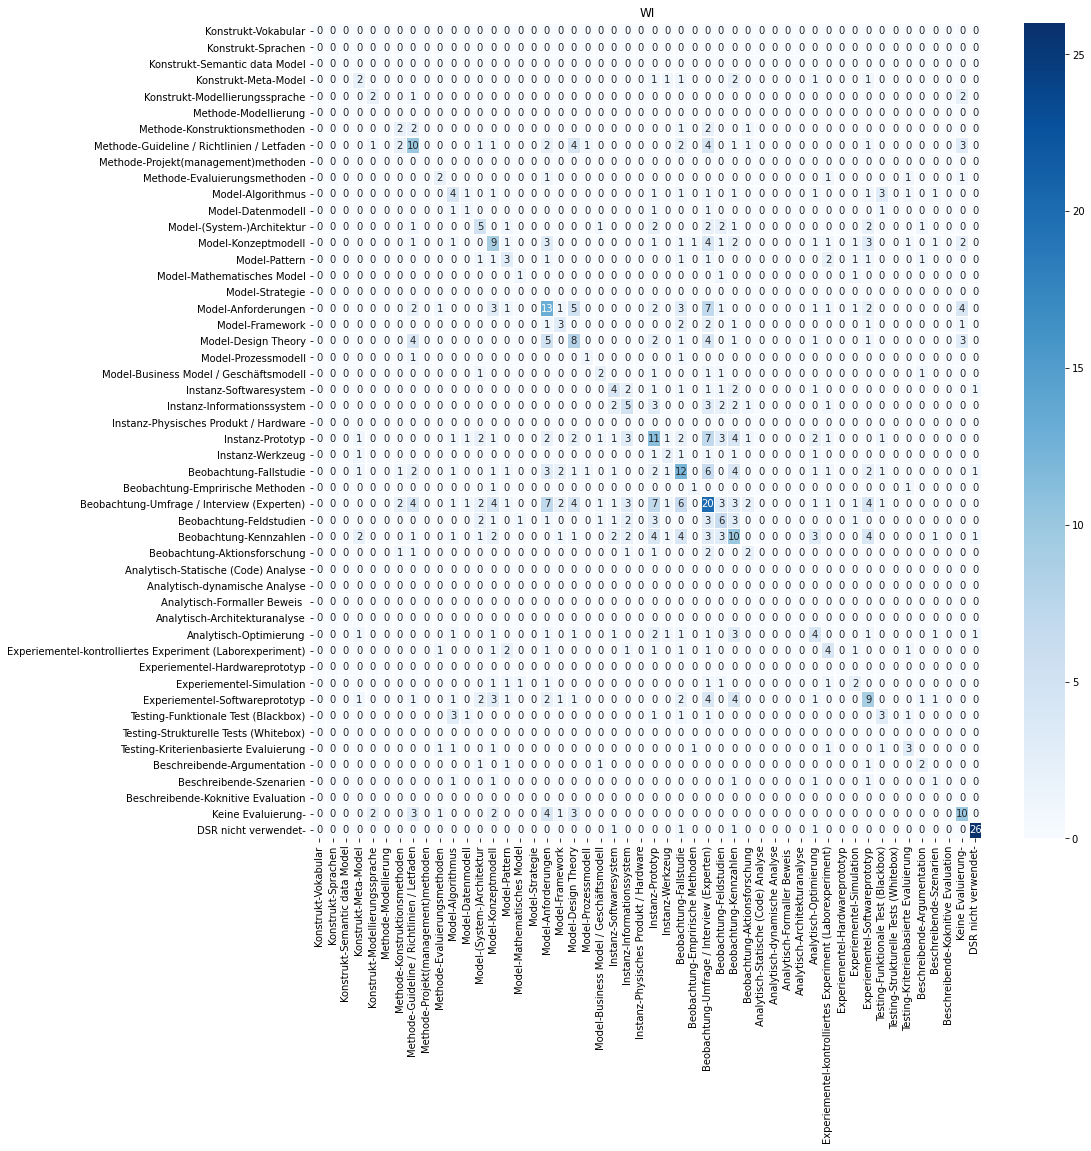

In [68]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='WI', xlabel='', ylabel='');
plt.savefig('./img/Gesamt_WI.png', dpi=400)

In [69]:
dfnl_temp = dfnl[dfnl['Konferenz'] == 'WI']
df_heat = dfnl_temp[artefacts_lv1].T.dot(dfnl_temp[evaluation_lv1])

In [70]:
df_heat

,Fallstudie,Emprirische Methoden,Umfrage / Interview (Experten),Feldstudien,Kennzahlen,Aktionsforschung,Statische (Code) Analyse,dynamische Analyse,Formaller Beweis,Architekturanalyse,...,kontrolliertes Experiment (Laborexperiment),Hardwareprototyp,Simulation,Softwareprototyp,Funktionale Test (Blackbox),Strukturelle Tests (Whitebox),Kriterienbasierte Evaluierung,Argumentation,Szenarien,Koknitive Evaluation
Vokabular,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sprachen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Semantic data Model,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Meta-Model,1,0,0,0,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Modellierungssprache,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Modellierung,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Konstruktionsmethoden,1,0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guideline / Richtlinien / Letfaden,2,0,4,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Projekt(management)methoden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Evaluierungsmethoden,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


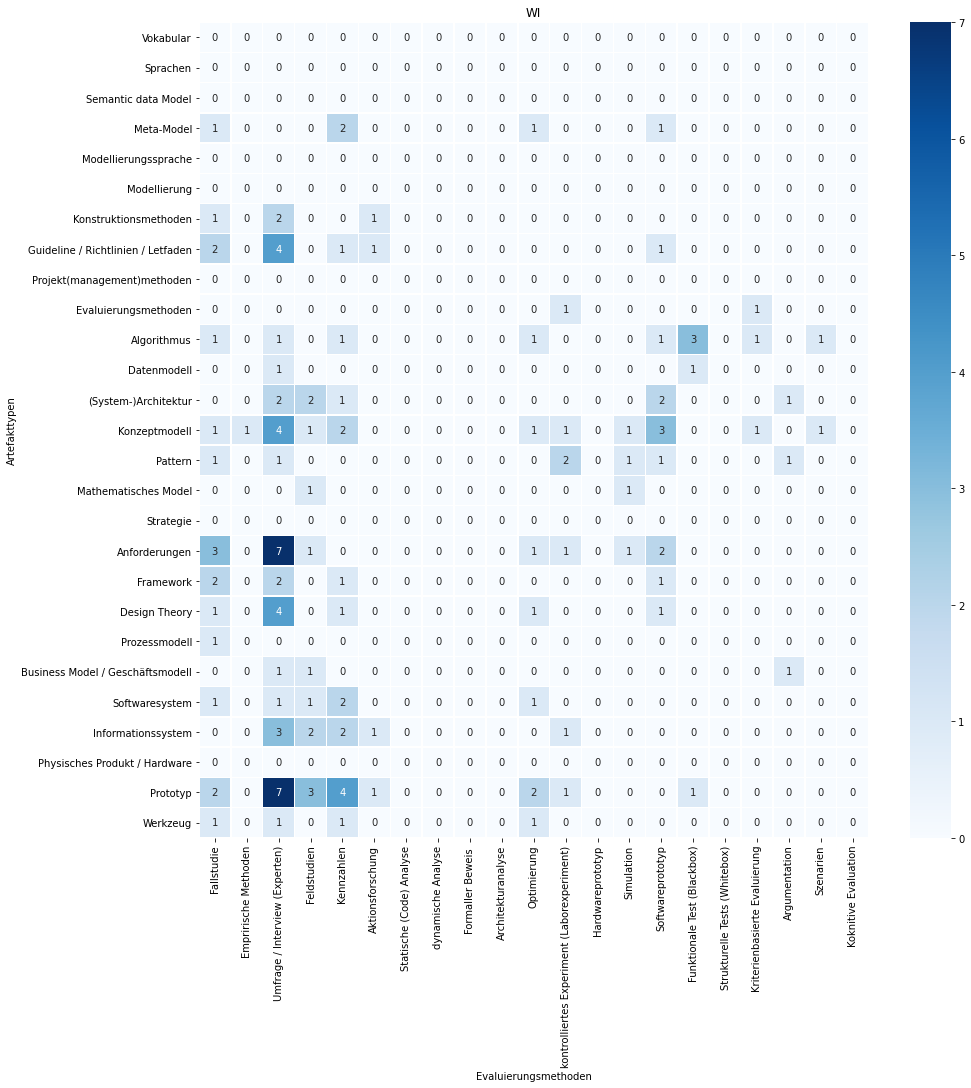

In [71]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='WI', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/ArtVal_WI.png', dpi=400)

In [72]:
df_cat = df[df.Konferenz == 'WI'][['Konferenz', 'Paper', 'DSR nicht verwendet']]

In [73]:
df_cat.head()

,Konferenz,Paper,DSR nicht verwendet
,,,
0,WI,(Espig et al 2019),0
1,WI,(Dremel et al 2019),1
2,WI,(Herrenkind et al 2019),0
3,WI,(Sauer und Schubert 2019),1
4,WI,(Poeppelbuss and Lubarski 2019),0


In [74]:
for i in all_categories:
    df_cat[str(i)] = df[df.Konferenz == 'WI'][str(i)].sum(axis=1)

In [75]:
df_cat.head()

,Konferenz,Paper,DSR nicht verwendet,Konstrukt,Methode,Model,Instanz,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,,,,,,,
0,WI,(Espig et al 2019),0,0,1,0,0,0,0,1,1,0
1,WI,(Dremel et al 2019),1,0,0,0,0,0,0,0,0,0
2,WI,(Herrenkind et al 2019),0,0,0,1,0,1,0,0,1,0
3,WI,(Sauer und Schubert 2019),1,0,0,0,0,0,0,0,0,0
4,WI,(Poeppelbuss and Lubarski 2019),0,0,0,1,0,0,0,0,0,0


In [76]:
df_heat = df_cat[artefacts].T.dot(df_cat[evaluation])

In [77]:
df_heat.head()

,,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,
Konstrukt,,3,1,1,0,0
Methode,,12,0,2,1,0
Model,,46,4,19,6,5
Instanz,,33,4,2,1,0


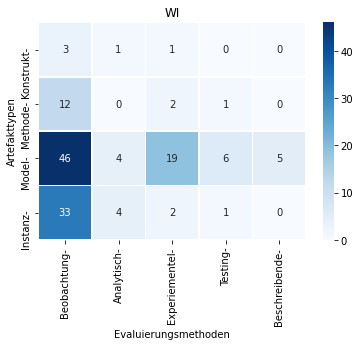

In [78]:
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='WI', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/Kategorien_WI.png', dpi=400)

**2016**

In [79]:
df[df.Jahr == 2016].head()

Konferenz-ID Konferenz  Jahr                             Paper Konstrukt  \
                                                                    Vokabular   
109  DESRIST 2016   DESRIST  2016     (Alharbi und Chatterjee 2016)         0   
110  DESRIST 2016   DESRIST  2016          (Haj-Bolouri et al 2016)         0   
111  DESRIST 2016   DESRIST  2016                (Kurse et al 2016)         0   
112  DESRIST 2016   DESRIST  2016         (Göbel und Cronholm 2016)         0   
113  DESRIST 2016   DESRIST  2016  (Keijzer-Broers und Reuver 2016)         0   

                                                                      Methode  \
    Sprachen Semantic data Model Meta-Model Modellierungssprache Modellierung   
109        0                   0          0                    0            0   
110        0                   0          0                    0            0   
111        0                   0          0                    0            0   
112        0                   0          0                    0            0   
113        0                   0          0                    0            0   

     ... Experiementel                                      Testing  \
     ...    Simulation Softwareprototyp Funktionale Test (Blackbox)   
109  ...             0                0                           0   
110  ...             0                0                           0   
111  ...             0                0                           0   
112  ...             0                0                           0   
113  ...             0                0                           0   

                                                                Beschreibende  \
    Strukturelle Tests (Whitebox) Kriterienbasierte Evaluierung Argumentation   
109                             0                             0             0   
110                             0                             0             0   
111                             0                             0             0   
112                             0                             0             0   
113                             0                             0             0   

                                   Keine Evaluierung DSR nicht verwendet  
    Szenarien Koknitive Evaluation                                        
109         0                    0                 0                   0  
110         0                    0                 0                   1  
111         0                    0                 0                   1  
112         0                    0                 0                   1  
113         0                    0                 0                   1  

[5 rows x 54 columns]

In [80]:
df_temp = df[df['Jahr'] == 2016]
df_cat = df_temp[df_temp.Jahr == 2016].drop(columns=['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper'])

In [81]:
df_heat = df_cat.T.dot(df_cat)

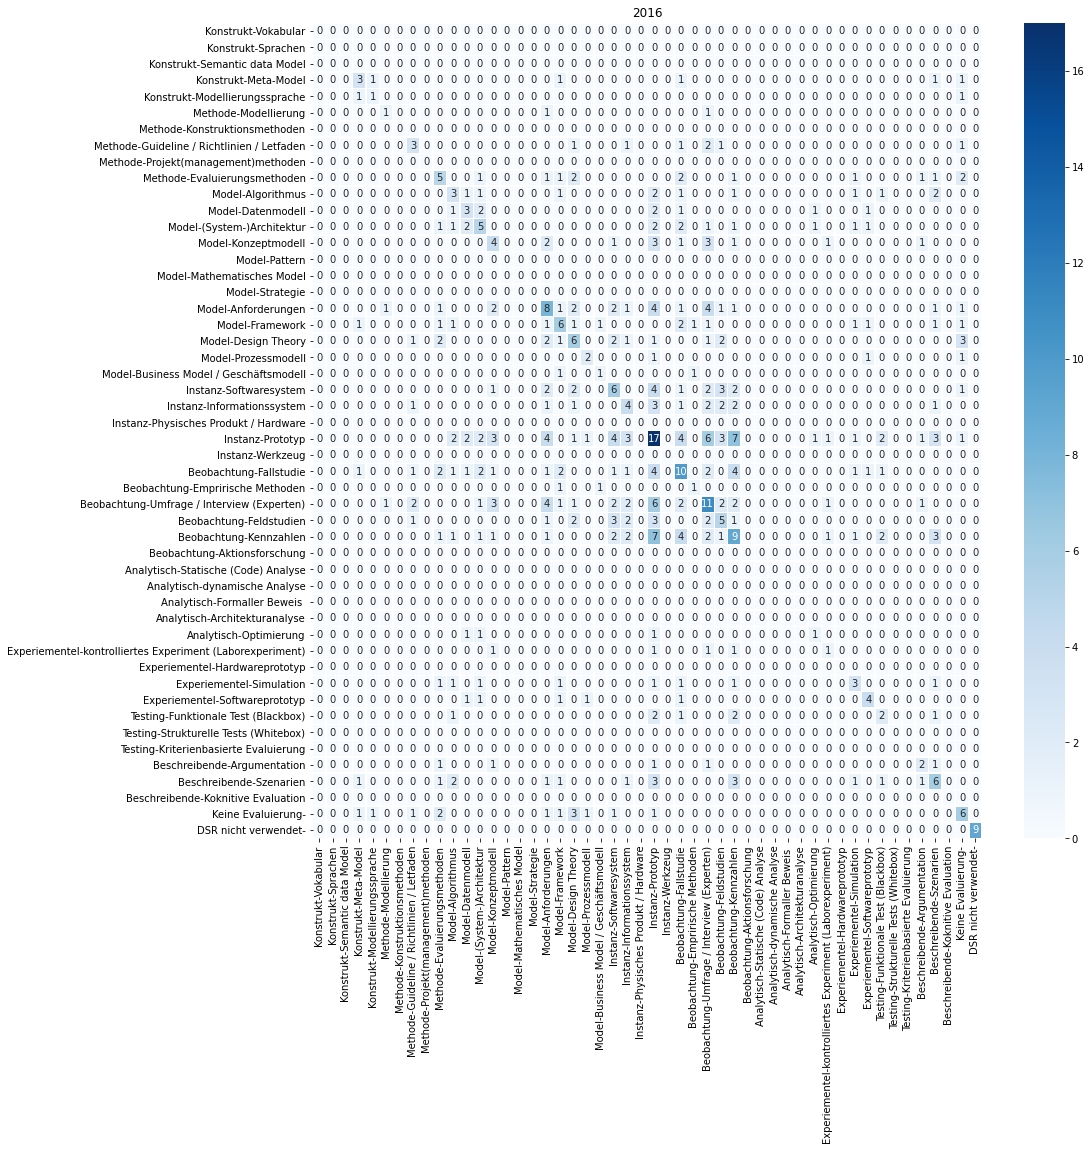

In [82]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2016', xlabel='', ylabel='');
plt.savefig('./img/Gesamt_2016.png', dpi=400)

In [83]:
dfnl_temp = dfnl[dfnl['Jahr'] == 2016]
df_heat = dfnl_temp[artefacts_lv1].T.dot(dfnl_temp[evaluation_lv1])

In [84]:
df_heat

,Fallstudie,Emprirische Methoden,Umfrage / Interview (Experten),Feldstudien,Kennzahlen,Aktionsforschung,Statische (Code) Analyse,dynamische Analyse,Formaller Beweis,Architekturanalyse,...,kontrolliertes Experiment (Laborexperiment),Hardwareprototyp,Simulation,Softwareprototyp,Funktionale Test (Blackbox),Strukturelle Tests (Whitebox),Kriterienbasierte Evaluierung,Argumentation,Szenarien,Koknitive Evaluation
Vokabular,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sprachen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Semantic data Model,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Meta-Model,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Modellierungssprache,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Modellierung,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Konstruktionsmethoden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guideline / Richtlinien / Letfaden,1,0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Projekt(management)methoden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Evaluierungsmethoden,2,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


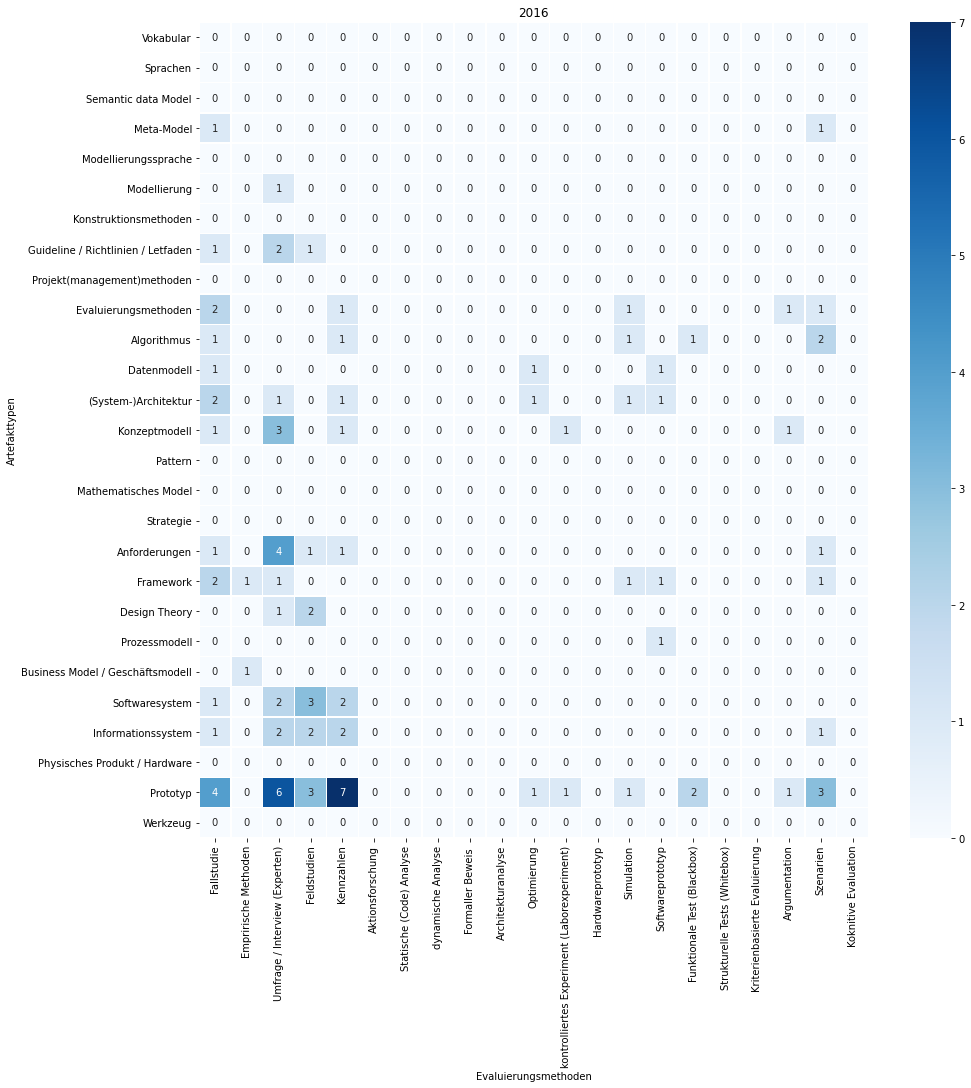

In [85]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2016', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/ArtVal_2016.png', dpi=400)

In [86]:
df_cat = df[df.Jahr == 2016][['Konferenz', 'Paper', 'DSR nicht verwendet']]

In [87]:
df_cat.head()

,Konferenz,Paper,DSR nicht verwendet
,,,
109,DESRIST,(Alharbi und Chatterjee 2016),0
110,DESRIST,(Haj-Bolouri et al 2016),1
111,DESRIST,(Kurse et al 2016),1
112,DESRIST,(Göbel und Cronholm 2016),1
113,DESRIST,(Keijzer-Broers und Reuver 2016),1


In [88]:
for i in all_categories:
    df_cat[str(i)] = df[df.Jahr == 2016][str(i)].sum(axis=1)

In [89]:
df_cat.head()

,Konferenz,Paper,DSR nicht verwendet,Konstrukt,Methode,Model,Instanz,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,,,,,,,
109,DESRIST,(Alharbi und Chatterjee 2016),0,0,0,0,1,2,0,0,0,0
110,DESRIST,(Haj-Bolouri et al 2016),1,0,0,0,0,0,0,0,0,0
111,DESRIST,(Kurse et al 2016),1,0,0,0,0,0,0,0,0,0
112,DESRIST,(Göbel und Cronholm 2016),1,0,0,0,0,0,0,0,0,0
113,DESRIST,(Keijzer-Broers und Reuver 2016),1,0,0,0,0,0,0,0,0,0


In [90]:
df_heat = df_cat[artefacts].T.dot(df_cat[evaluation])

In [91]:
df_heat.head()

,,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,
Konstrukt,,1,0,0,0,1
Methode,,8,0,1,0,2
Model,,27,2,8,1,5
Instanz,,35,1,2,2,5


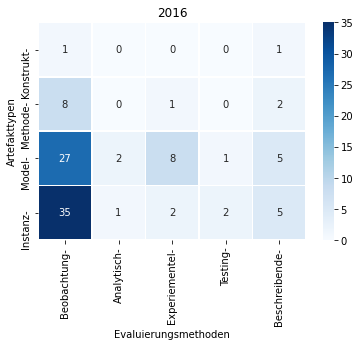

In [92]:
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2016', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/Kategorien_2016.png', dpi=400)

**2017**

In [93]:
df[df.Jahr == 2017].head()

Konferenz-ID Konferenz  Jahr                                      Paper  \
                                                                             
65      WI 2017        WI  2017                       (Dreyer et al, 2017)   
66      WI 2017        WI  2017               (Schäffer and Stelzer, 2017)   
67      WI 2017        WI  2017               (Semmann and Grotherr, 2017)   
68      WI 2017        WI  2017  (Niemöller et al, 2017a - Design and (…))   
69      WI 2017        WI  2017                   (Beverungen et al, 2017)   

   Konstrukt                                                               \
   Vokabular Sprachen Semantic data Model Meta-Model Modellierungssprache   
65         0        0                   0          0                    0   
66         0        0                   0          0                    0   
67         0        0                   0          0                    0   
68         0        0                   0          0                    0   
69         0        0                   0          0                    0   

        Methode  ... Experiementel                   \
   Modellierung  ...    Simulation Softwareprototyp   
65            0  ...             0                0   
66            0  ...             0                0   
67            0  ...             0                0   
68            0  ...             0                0   
69            0  ...             0                0   

                       Testing                                \
   Funktionale Test (Blackbox) Strukturelle Tests (Whitebox)   
65                           0                             0   
66                           0                             0   
67                           0                             0   
68                           0                             0   
69                           0                             0   

                                 Beschreibende                                 \
   Kriterienbasierte Evaluierung Argumentation Szenarien Koknitive Evaluation   
65                             0             0         0                    0   
66                             0             0         0                    0   
67                             0             0         0                    0   
68                             0             0         0                    0   
69                             0             0         0                    0   

   Keine Evaluierung DSR nicht verwendet  
                                          
65                 0                   1  
66                 0                   1  
67                 0                   0  
68                 0                   0  
69                 0                   1  

[5 rows x 54 columns]

In [94]:
df_temp = df[df['Jahr'] == 2017]
df_cat = df_temp[df_temp.Jahr == 2017].drop(columns=['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper'])

In [95]:
df_heat = df_cat.T.dot(df_cat)

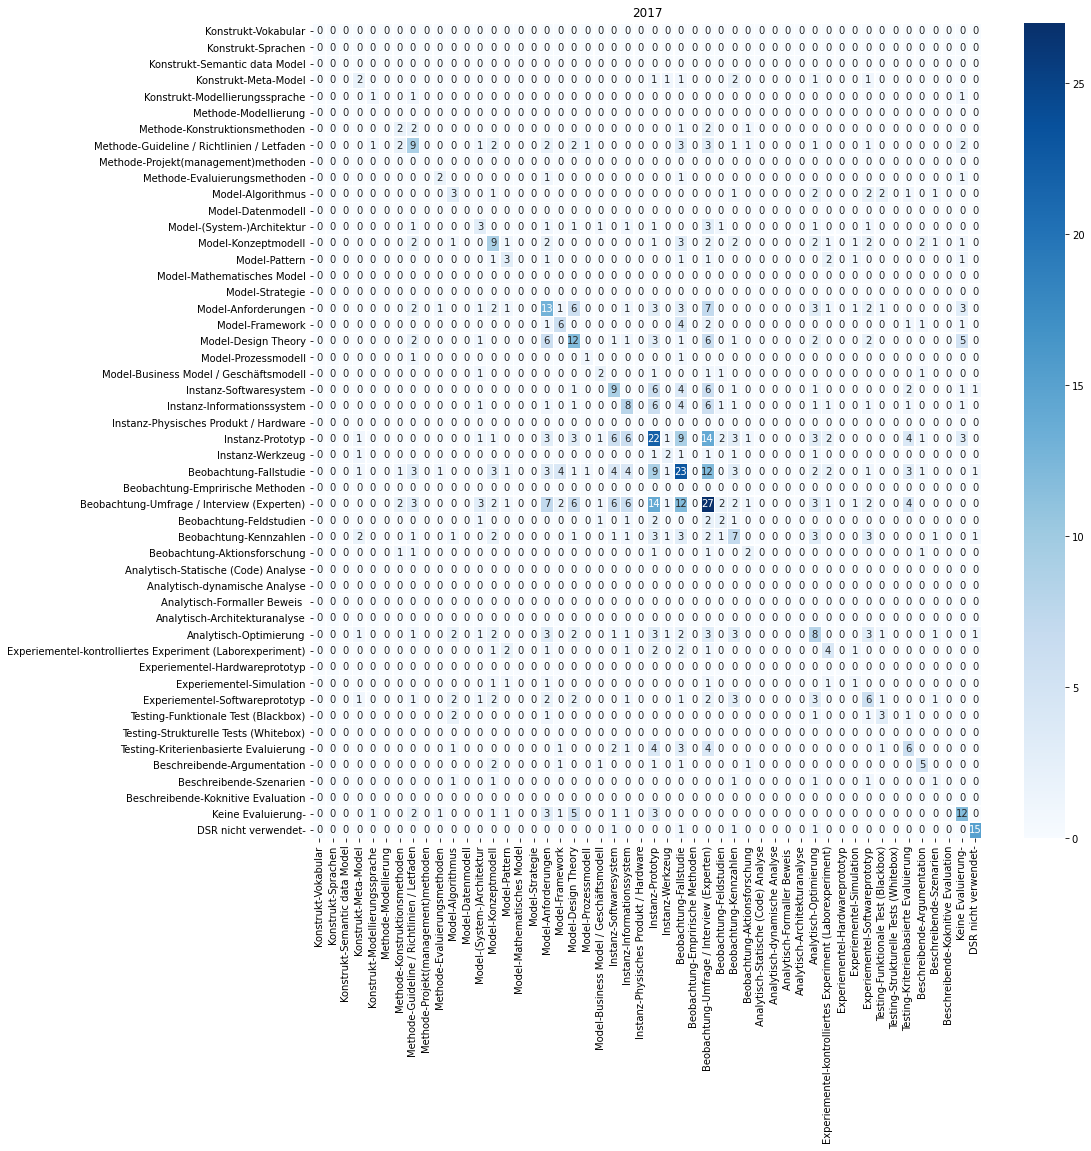

In [96]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2017', xlabel='', ylabel='');
plt.savefig('./img/Gesamt_2017.png', dpi=400)

In [97]:
dfnl_temp = dfnl[dfnl['Jahr'] == 2017]
df_heat = dfnl_temp[artefacts_lv1].T.dot(dfnl_temp[evaluation_lv1])

In [98]:
df_heat

,Fallstudie,Emprirische Methoden,Umfrage / Interview (Experten),Feldstudien,Kennzahlen,Aktionsforschung,Statische (Code) Analyse,dynamische Analyse,Formaller Beweis,Architekturanalyse,...,kontrolliertes Experiment (Laborexperiment),Hardwareprototyp,Simulation,Softwareprototyp,Funktionale Test (Blackbox),Strukturelle Tests (Whitebox),Kriterienbasierte Evaluierung,Argumentation,Szenarien,Koknitive Evaluation
Vokabular,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sprachen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Semantic data Model,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Meta-Model,1,0,0,0,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Modellierungssprache,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Modellierung,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Konstruktionsmethoden,1,0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guideline / Richtlinien / Letfaden,3,0,3,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Projekt(management)methoden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Evaluierungsmethoden,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


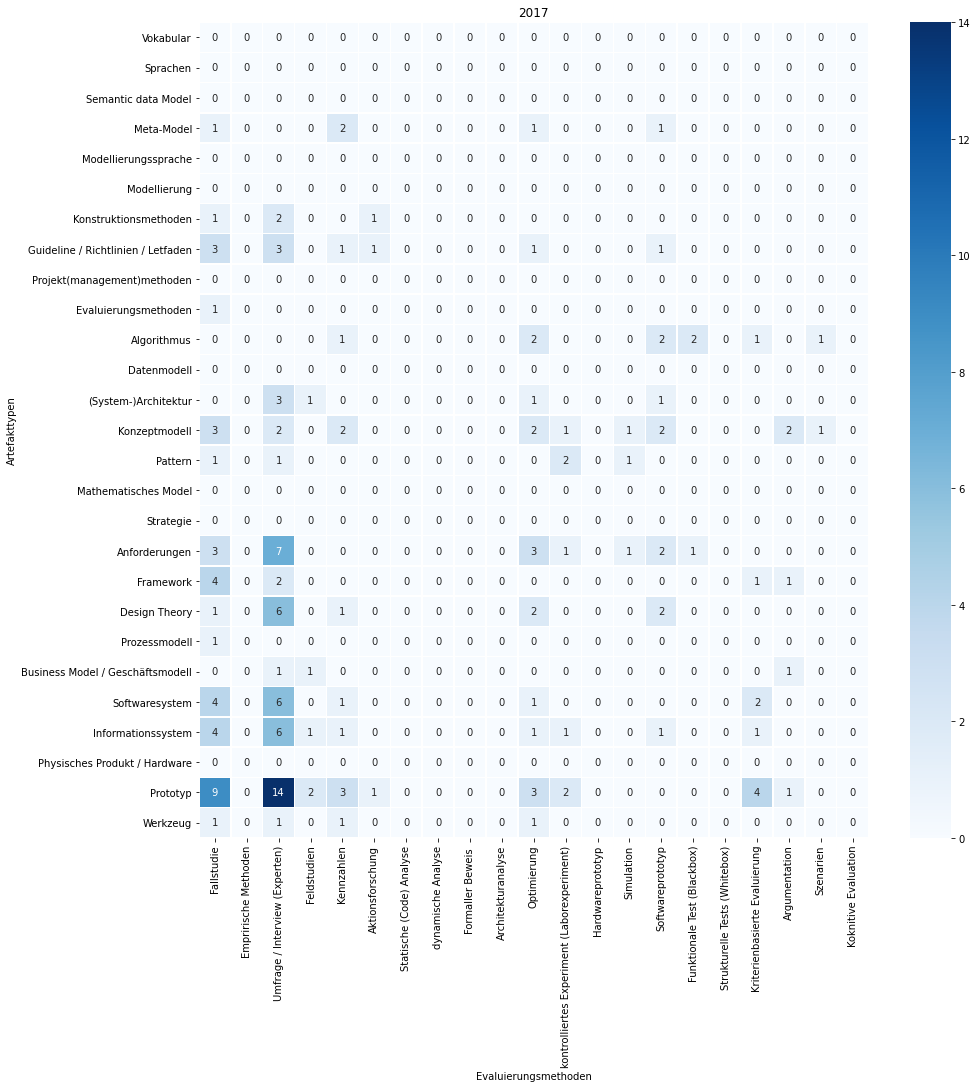

In [99]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2017', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/ArtVal_2017.png', dpi=400)

In [100]:
df_cat = df[df.Jahr == 2017][['Konferenz', 'Paper', 'DSR nicht verwendet']]

In [101]:
df_cat.head()

,Konferenz,Paper,DSR nicht verwendet
,,,
65,WI,"(Dreyer et al, 2017)",1
66,WI,"(Schäffer and Stelzer, 2017)",1
67,WI,"(Semmann and Grotherr, 2017)",0
68,WI,"(Niemöller et al, 2017a - Design and (…))",0
69,WI,"(Beverungen et al, 2017)",1


In [102]:
for i in all_categories:
    df_cat[str(i)] = df[df.Jahr == 2017][str(i)].sum(axis=1)

In [103]:
df_cat.head()

,Konferenz,Paper,DSR nicht verwendet,Konstrukt,Methode,Model,Instanz,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,,,,,,,
65,WI,"(Dreyer et al, 2017)",1,0,0,0,0,0,0,0,0,0
66,WI,"(Schäffer and Stelzer, 2017)",1,0,0,0,0,0,0,0,0,0
67,WI,"(Semmann and Grotherr, 2017)",0,0,0,2,1,2,0,0,0,0
68,WI,"(Niemöller et al, 2017a - Design and (…))",0,0,0,2,1,1,1,0,0,0
69,WI,"(Beverungen et al, 2017)",1,0,0,0,0,0,0,0,0,0


In [104]:
df_heat = df_cat[artefacts].T.dot(df_cat[evaluation])

In [105]:
df_heat.head()

,,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,
Konstrukt,,3,1,1,0,0
Methode,,13,1,1,0,0
Model,,41,10,16,5,6
Instanz,,55,6,4,7,1


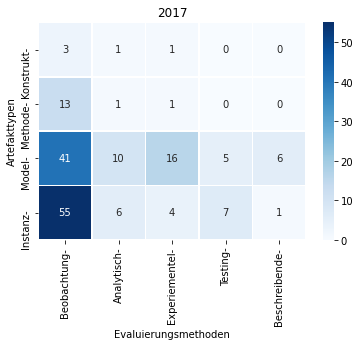

In [106]:
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2017', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/Kategorien_2017.png', dpi=400)

**2018**

In [107]:
df[df.Jahr == 2018].head()

Konferenz-ID Konferenz  Jahr                       Paper Konstrukt  \
                                                               Vokabular   
34  MKWI 2018 / B1      MKWI  2018   (Heidekrüger et al, 2018)         0   
35  MKWI 2018 / B1      MKWI  2018  (Oppenlaender et al, 2018)         0   
36  MKWI 2018 / B1      MKWI  2018          (Raso et al, 2018)         0   
37  MKWI 2018 / B1      MKWI  2018   (Spiekermann et al, 2018)         0   
38  MKWI 2018 / B1      MKWI  2018        (Gebski et al, 2018)         0   

                                                                     Methode  \
   Sprachen Semantic data Model Meta-Model Modellierungssprache Modellierung   
34        0                   0          0                    0            0   
35        0                   0          0                    0            0   
36        0                   0          0                    0            0   
37        0                   0          0                    0            0   
38        0                   0          0                    0            0   

    ... Experiementel                                      Testing  \
    ...    Simulation Softwareprototyp Funktionale Test (Blackbox)   
34  ...             0                0                           0   
35  ...             0                0                           0   
36  ...             0                0                           0   
37  ...             0                0                           0   
38  ...             0                0                           0   

                                                               Beschreibende  \
   Strukturelle Tests (Whitebox) Kriterienbasierte Evaluierung Argumentation   
34                             0                             0             0   
35                             0                             0             0   
36                             0                             0             0   
37                             0                             0             0   
38                             0                             0             0   

                                  Keine Evaluierung DSR nicht verwendet  
   Szenarien Koknitive Evaluation                                        
34         0                    0                 1                   0  
35         0                    0                 1                   0  
36         0                    0                 0                   0  
37         0                    0                 0                   1  
38         0                    0                 0                   0  

[5 rows x 54 columns]

In [108]:
df_temp = df[df['Jahr'] == 2018]
df_cat = df_temp[df_temp.Jahr == 2018].drop(columns=['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper'])

In [109]:
df_heat = df_cat.T.dot(df_cat)

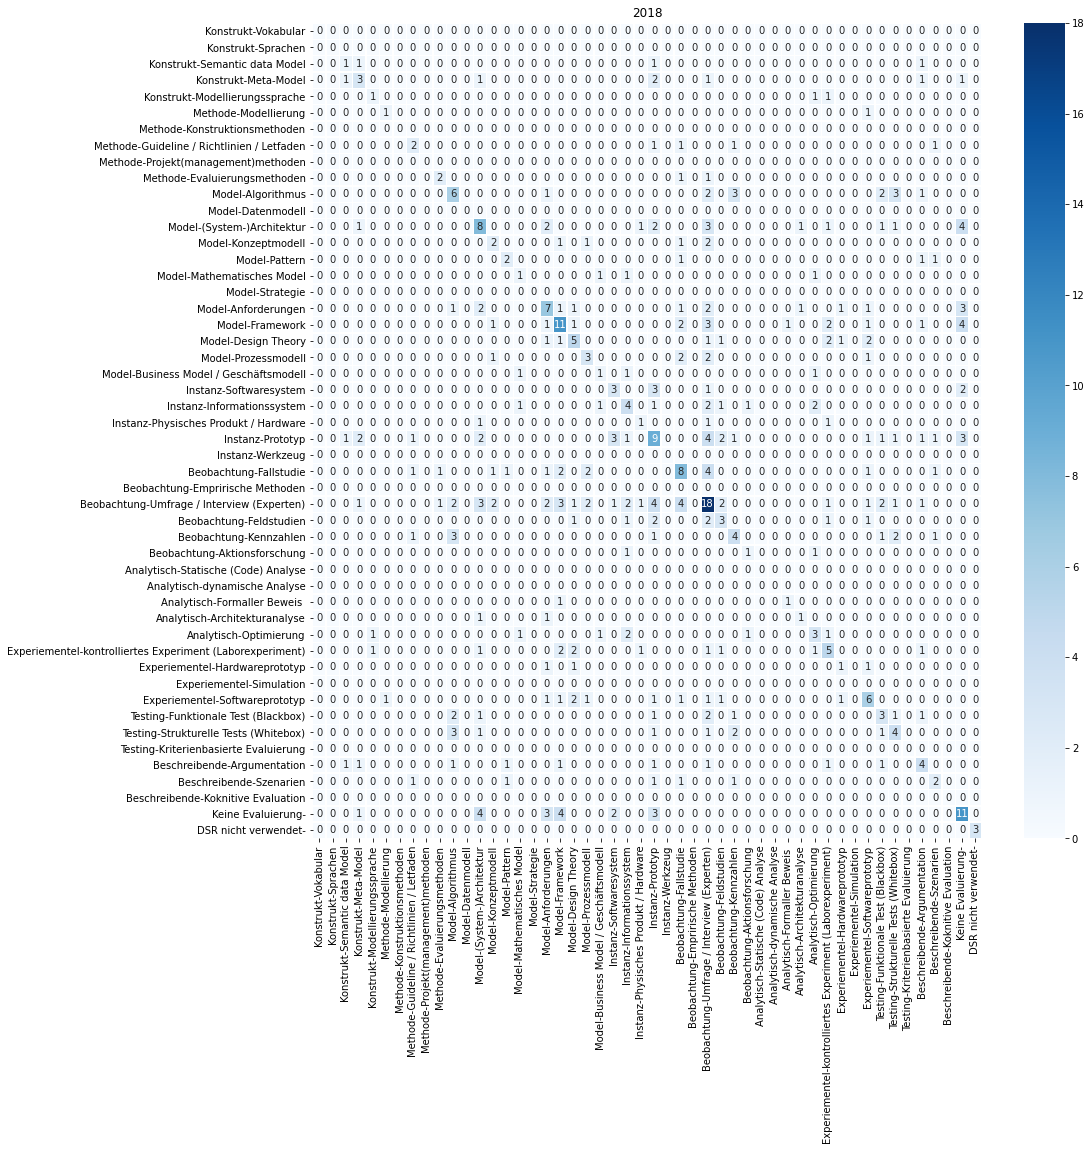

In [110]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2018', xlabel='', ylabel='');
plt.savefig('./img/Gesamt_2018.png', dpi=400)

In [111]:
dfnl_temp = dfnl[dfnl['Jahr'] == 2018]
df_heat = dfnl_temp[artefacts_lv1].T.dot(dfnl_temp[evaluation_lv1])

In [112]:
df_heat

,Fallstudie,Emprirische Methoden,Umfrage / Interview (Experten),Feldstudien,Kennzahlen,Aktionsforschung,Statische (Code) Analyse,dynamische Analyse,Formaller Beweis,Architekturanalyse,...,kontrolliertes Experiment (Laborexperiment),Hardwareprototyp,Simulation,Softwareprototyp,Funktionale Test (Blackbox),Strukturelle Tests (Whitebox),Kriterienbasierte Evaluierung,Argumentation,Szenarien,Koknitive Evaluation
Vokabular,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sprachen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Semantic data Model,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Meta-Model,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Modellierungssprache,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Modellierung,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Konstruktionsmethoden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guideline / Richtlinien / Letfaden,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Projekt(management)methoden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Evaluierungsmethoden,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


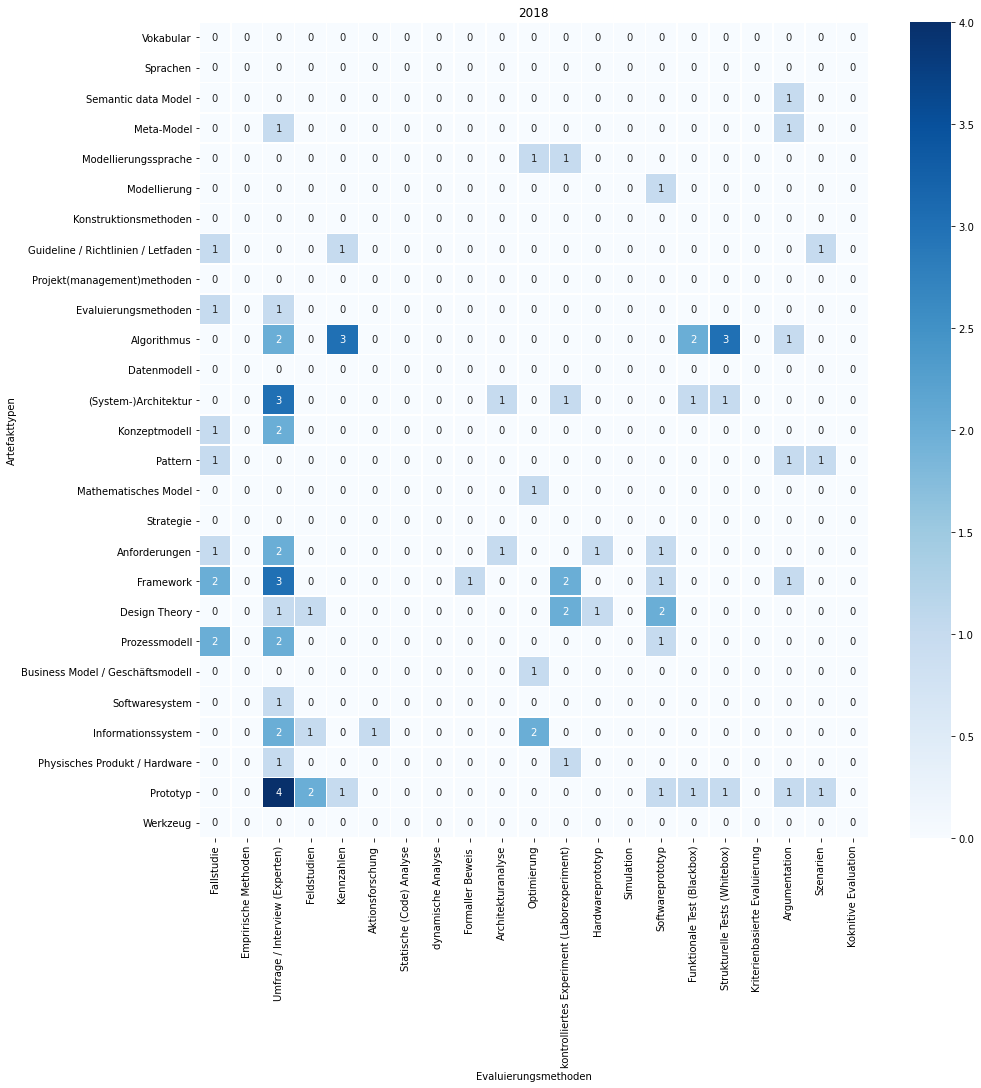

In [113]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2018', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/ArtVal_2018.png', dpi=400)

In [114]:
df_cat = df[df.Jahr == 2018][['Konferenz', 'Paper', 'DSR nicht verwendet']]

In [115]:
df_cat.head()

,Konferenz,Paper,DSR nicht verwendet
,,,
34,MKWI,"(Heidekrüger et al, 2018)",0
35,MKWI,"(Oppenlaender et al, 2018)",0
36,MKWI,"(Raso et al, 2018)",0
37,MKWI,"(Spiekermann et al, 2018)",1
38,MKWI,"(Gebski et al, 2018)",0


In [116]:
for i in all_categories:
    df_cat[str(i)] = df[df.Jahr == 2018][str(i)].sum(axis=1)

In [117]:
df_cat.head()

,Konferenz,Paper,DSR nicht verwendet,Konstrukt,Methode,Model,Instanz,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,,,,,,,
34,MKWI,"(Heidekrüger et al, 2018)",0,0,0,1,0,0,0,0,0,0
35,MKWI,"(Oppenlaender et al, 2018)",0,0,0,1,0,0,0,0,0,0
36,MKWI,"(Raso et al, 2018)",0,0,0,1,1,1,0,1,0,0
37,MKWI,"(Spiekermann et al, 2018)",1,0,0,0,0,0,0,0,0,0
38,MKWI,"(Gebski et al, 2018)",0,0,0,2,1,0,1,0,0,0


In [118]:
df_heat = df_cat[artefacts].T.dot(df_cat[evaluation])

In [119]:
df_heat.head()

,,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,
Konstrukt,,1,1,1,0,2
Methode,,4,0,1,0,1
Model,,26,5,12,7,4
Instanz,,13,2,2,2,2


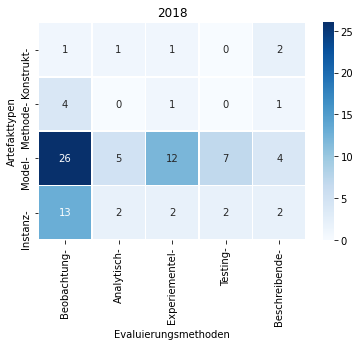

In [120]:
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2018', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/Kategorien_2018.png', dpi=400)

**2019**

In [121]:
df[df.Jahr == 2019].head()

Konferenz-ID Konferenz  Jahr                            Paper Konstrukt  \
                                                                Vokabular   
0      WI 2019        WI  2019               (Espig et al 2019)         0   
1      WI 2019        WI  2019              (Dremel et al 2019)         0   
2      WI 2019        WI  2019          (Herrenkind et al 2019)         0   
3      WI 2019        WI  2019        (Sauer und Schubert 2019)         0   
4      WI 2019        WI  2019  (Poeppelbuss and Lubarski 2019)         0   

                                                                    Methode  \
  Sprachen Semantic data Model Meta-Model Modellierungssprache Modellierung   
0        0                   0          0                    0            0   
1        0                   0          0                    0            0   
2        0                   0          0                    0            0   
3        0                   0          0                    0            0   
4        0                   0          0                    0            0   

   ... Experiementel                                      Testing  \
   ...    Simulation Softwareprototyp Funktionale Test (Blackbox)   
0  ...             0                0                           0   
1  ...             0                0                           0   
2  ...             0                0                           1   
3  ...             0                0                           0   
4  ...             0                0                           0   

                                                              Beschreibende  \
  Strukturelle Tests (Whitebox) Kriterienbasierte Evaluierung Argumentation   
0                             0                             1             0   
1                             0                             0             0   
2                             0                             0             0   
3                             0                             0             0   
4                             0                             0             0   

                                 Keine Evaluierung DSR nicht verwendet  
  Szenarien Koknitive Evaluation                                        
0         0                    0                 0                   0  
1         0                    0                 0                   1  
2         0                    0                 0                   0  
3         0                    0                 0                   1  
4         0                    0                 1                   0  

[5 rows x 54 columns]

In [122]:
df_temp = df[df['Jahr'] == 2019]
df_cat = df_temp[df_temp.Jahr == 2019].drop(columns=['Konferenz-ID', 'Konferenz', 'Jahr', 'Paper'])

In [123]:
df_heat = df_cat.T.dot(df_cat)

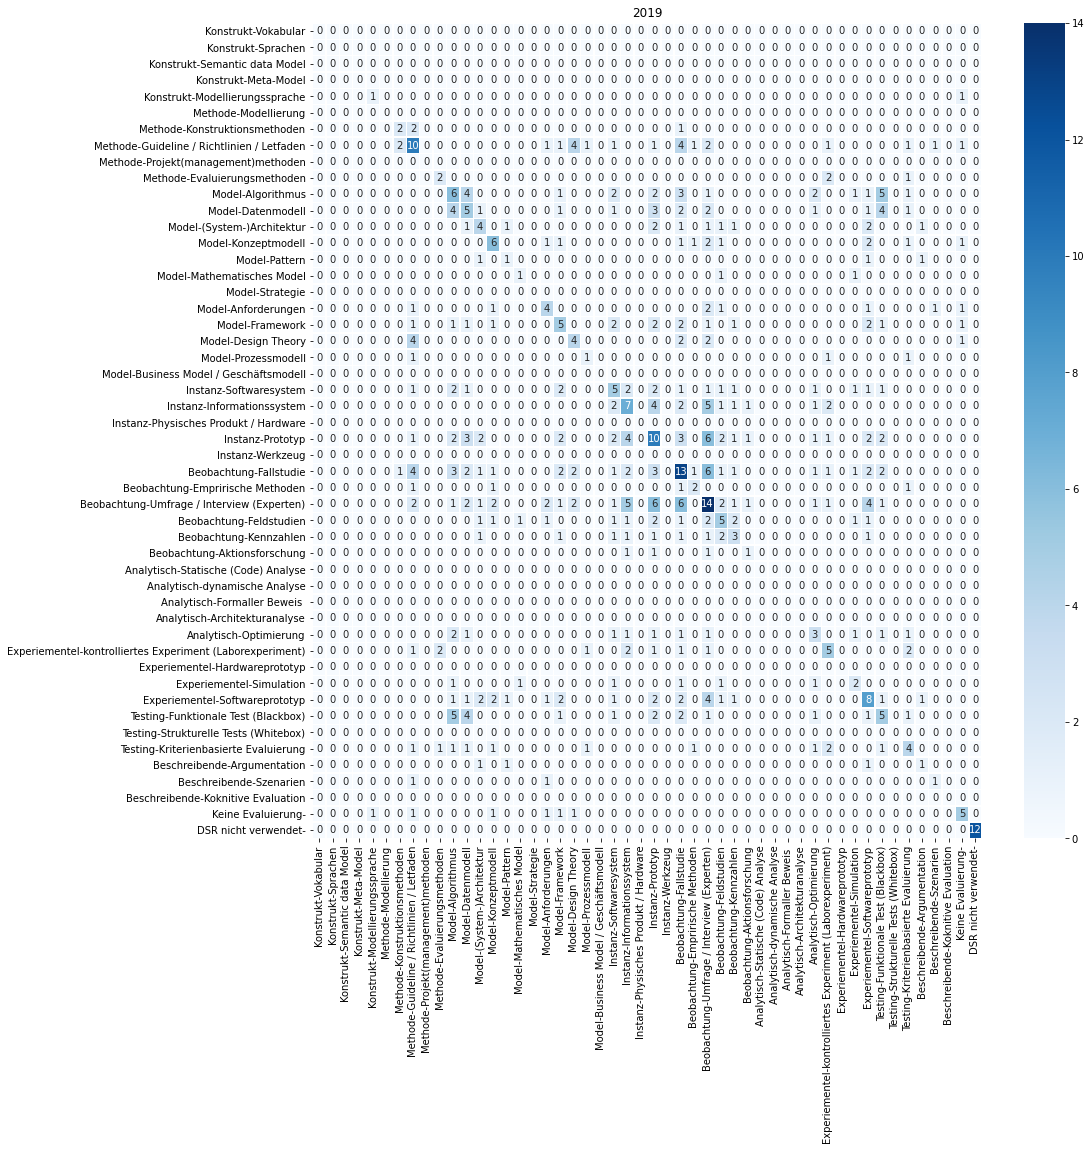

In [124]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2019', xlabel='', ylabel='');
plt.savefig('./img/Gesamt_2019.png', dpi=400)

In [125]:
dfnl_temp = dfnl[dfnl['Jahr'] == 2019]
df_heat = dfnl_temp[artefacts_lv1].T.dot(dfnl_temp[evaluation_lv1])

In [126]:
df_heat

,Fallstudie,Emprirische Methoden,Umfrage / Interview (Experten),Feldstudien,Kennzahlen,Aktionsforschung,Statische (Code) Analyse,dynamische Analyse,Formaller Beweis,Architekturanalyse,...,kontrolliertes Experiment (Laborexperiment),Hardwareprototyp,Simulation,Softwareprototyp,Funktionale Test (Blackbox),Strukturelle Tests (Whitebox),Kriterienbasierte Evaluierung,Argumentation,Szenarien,Koknitive Evaluation
Vokabular,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sprachen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Semantic data Model,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Meta-Model,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Modellierungssprache,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Modellierung,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Konstruktionsmethoden,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guideline / Richtlinien / Letfaden,4,1,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
Projekt(management)methoden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Evaluierungsmethoden,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,0,0


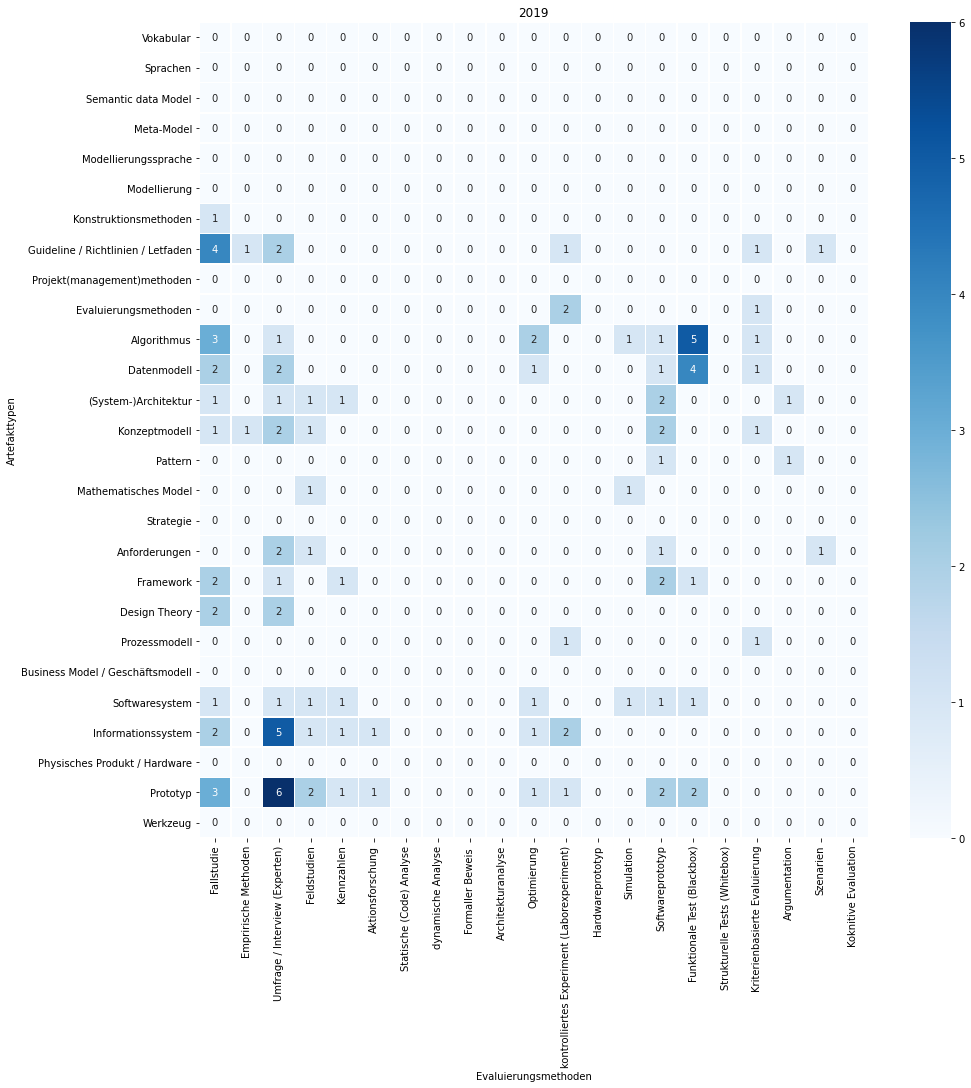

In [127]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2019', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/ArtVal_2019.png', dpi=400)

In [128]:
df_cat = df[df.Jahr == 2019][['Konferenz', 'Paper', 'DSR nicht verwendet']]

In [129]:
df_cat.head()

,Konferenz,Paper,DSR nicht verwendet
,,,
0,WI,(Espig et al 2019),0
1,WI,(Dremel et al 2019),1
2,WI,(Herrenkind et al 2019),0
3,WI,(Sauer und Schubert 2019),1
4,WI,(Poeppelbuss and Lubarski 2019),0


In [130]:
for i in all_categories:
    df_cat[str(i)] = df[df.Jahr == 2019][str(i)].sum(axis=1)

In [131]:
df_cat.head()

,Konferenz,Paper,DSR nicht verwendet,Konstrukt,Methode,Model,Instanz,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,,,,,,,
0,WI,(Espig et al 2019),0,0,1,0,0,0,0,1,1,0
1,WI,(Dremel et al 2019),1,0,0,0,0,0,0,0,0,0
2,WI,(Herrenkind et al 2019),0,0,0,1,0,1,0,0,1,0
3,WI,(Sauer und Schubert 2019),1,0,0,0,0,0,0,0,0,0
4,WI,(Poeppelbuss and Lubarski 2019),0,0,0,1,0,0,0,0,0,0


In [132]:
df_heat = df_cat[artefacts].T.dot(df_cat[evaluation])

In [133]:
df_heat.head()

,,Beobachtung,Analytisch,Experiementel,Testing,Beschreibende
,,,,,,
Konstrukt,,0,0,0,0,0
Methode,,8,0,3,2,1
Model,,29,3,13,14,3
Instanz,,27,3,7,3,0


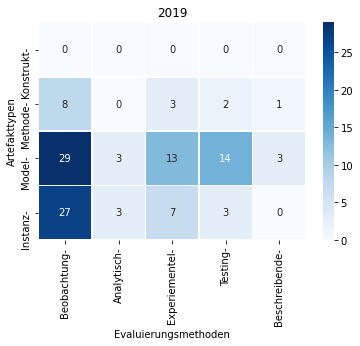

In [134]:
sns.heatmap(df_heat, linewidths=.5, annot=True, fmt='g', cmap="Blues").set(title='2019', xlabel='Evaluierungsmethoden', ylabel='Artefakttypen');
plt.savefig('./img/Kategorien_2019.png', dpi=400)

In [136]:
df_temp = df[df['Jahr'] == 2018]